## Simple demonstration of metrics

In [1]:
import os
import sys
sys.path.append('..')
import segmetrics
from skimage.io import imread

In [2]:
p = '/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12'
true = imread(os.path.join(p, 'labels_compressed', 'l_3.tif'))
pred = imread(os.path.join(p, 'segmented_2019-11-27', 's_3.tif'))

In [3]:
metrix = segmetrics.calculate(true, pred)

In [4]:
print(metrix)


UNet Segmentation Metrics: 
True objects: 		  115
Predicted objects: 	  109
True positives: 	  106
False positives: 	    2
False negatives: 	    4
Jaccard metric: 	    0.95
Mean IoU metric: 	    0.85
Pixel identity: 	    0.99



In [5]:
# uncomment for interactive
# %matplotlib qt

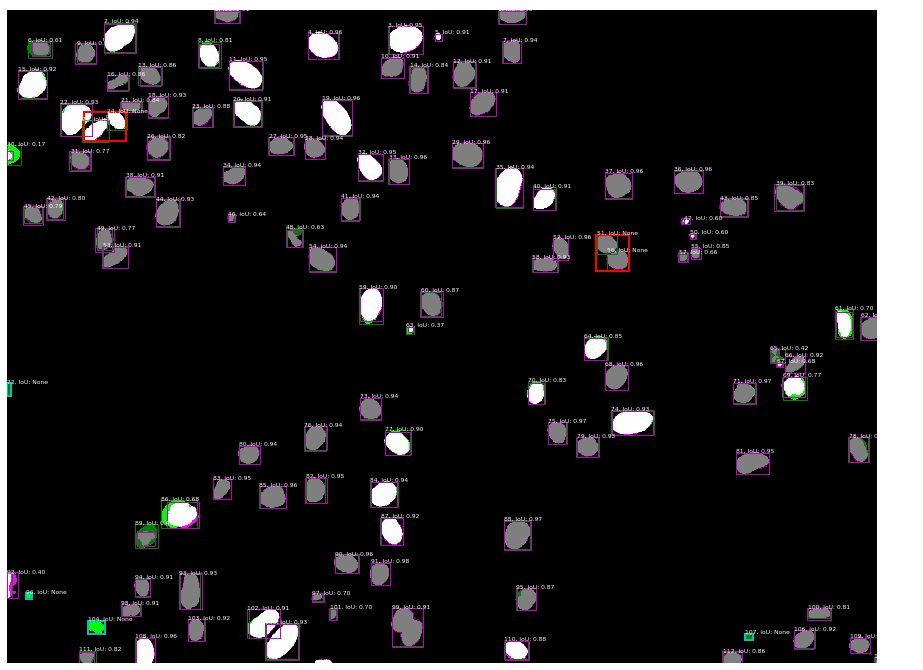

In [6]:
metrix.plot()

In [7]:
print(metrix.metrics)

[115, 109, 106, 2, 4, 0.8507625770462496, 0.9464285714285714, 0.9912901041666666]


In [8]:
for i in range(10):
    true = imread(os.path.join(p, 'labels_compressed', f'l_{i}.tif'))
    pred = imread(os.path.join(p, 'segmented_2019-11-27', f's_{i}.tif'))
    metrix = segmetrics.calculate(true, pred)
    print(i, metrix)

0 
UNet Segmentation Metrics: 
True objects: 		  105
Predicted objects: 	  111
True positives: 	   91
False positives: 	   12
False negatives: 	    3
Jaccard metric: 	    0.86
Mean IoU metric: 	    0.84
Pixel identity: 	    0.99

oof
1 
UNet Segmentation Metrics: 
True objects: 		  110
Predicted objects: 	  103
True positives: 	   96
False positives: 	    6
False negatives: 	    7
Jaccard metric: 	    0.88
Mean IoU metric: 	    0.85
Pixel identity: 	    0.99

2 
UNet Segmentation Metrics: 
True objects: 		  104
Predicted objects: 	  104
True positives: 	   96
False positives: 	    3
False negatives: 	    1
Jaccard metric: 	    0.96
Mean IoU metric: 	    0.86
Pixel identity: 	    0.99

3 
UNet Segmentation Metrics: 
True objects: 		  115
Predicted objects: 	  109
True positives: 	  106
False positives: 	    2
False negatives: 	    4
Jaccard metric: 	    0.95
Mean IoU metric: 	    0.85
Pixel identity: 	    0.99

oof
4 
UNet Segmentation Metrics: 
True objects: 		  138
Predicted objects: 

AssertionError: 